<a href="https://colab.research.google.com/github/George090872/Computer-Vision/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab 3: Edge Detector- Canny Edge detector

#### Effect of sharpening on edge detection
1.1) Apply a Sobel edge detector to the image `building-1200by1200.tif` with a kernel size of 3. Then apply binary thresholding with thresholds 150 and 200 (info on thresholding can be found in link 4). Show the result of sobel before and after thresholding.

1.2) Use the following steps to sharpen the `building-1200by1200.tif`:

1.   Blur the original image using a Gaussian filter.
2.   Subtract the blurred image from the original image.
3.   Add the subtracted image back to the original image.
    
    After sharpening the image, apply the Sobel edge detector, then apply binary thresholding with 150 and 200

1.3) Comment on the effectiveness of using sharpening prior to the edge detection.

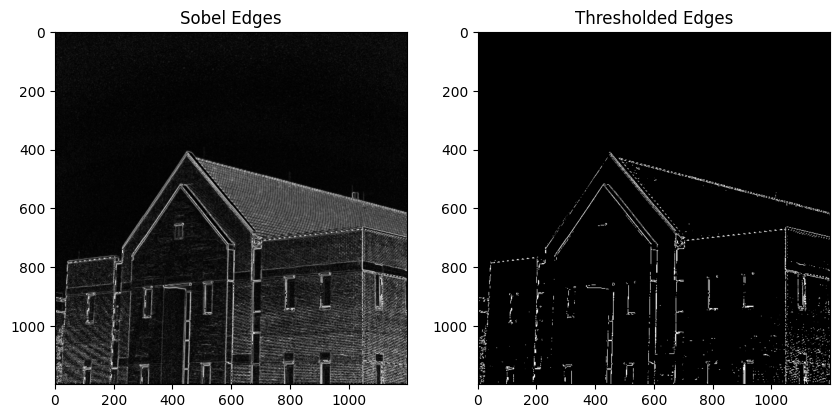

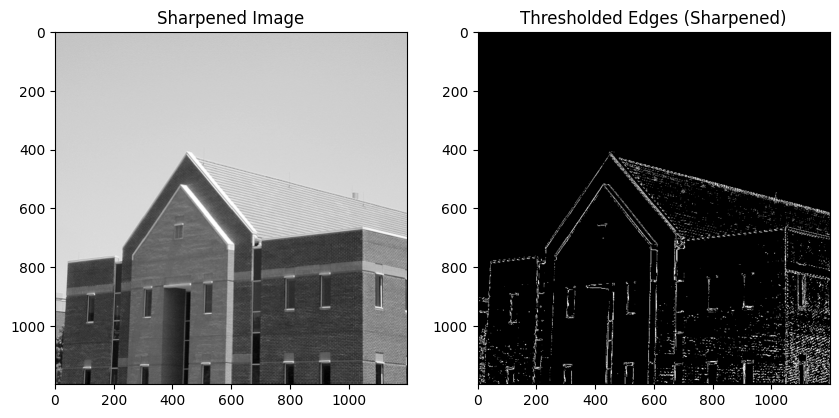

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
img = cv2.imread('building-1200by1200.tif', 0)

# Apply Sobel edge detector
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # x-direction
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # y-direction

# Calculate the magnitude of the gradient
abs_grad_x = np.uint8(np.absolute(sobelx))
abs_grad_y = np.uint8(np.absolute(sobely))
grad = np.uint8(np.sqrt(sobelx**2 + sobely**2))
# Apply binary thresholding
ret, thresh = cv2.threshold(grad, 150, 200, cv2.THRESH_BINARY)
# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(grad, cmap='gray'), plt.title('Sobel Edges')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded Edges')
plt.show()

##1.2
# Blur the image
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Subtract the blurred image from the original
subtracted = cv2.subtract(img, blur)

# Add the subtracted image back to the original
sharpened = cv2.add(img, subtracted)

# Apply Sobel edge detector to the sharpened image
sobelx_sharpened = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=3)  # x-direction
sobely_sharpened = cv2.Sobel(sharpened, cv2.CV_64F, 0, 1, ksize=3)  # y-direction

# Calculate the magnitude of the gradient (sharpened)
abs_grad_x_sharpened = np.uint8(np.absolute(sobelx_sharpened))
abs_grad_y_sharpened = np.uint8(np.absolute(sobely_sharpened))
grad_sharpened = np.uint8(np.sqrt(sobelx_sharpened**2 + sobely_sharpened**2))

# Apply binary thresholding to the sharpened image
ret_sharpened, thresh_sharpened = cv2.threshold(grad_sharpened, 150, 200, cv2.THRESH_BINARY)
# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened Image')
plt.subplot(122), plt.imshow(thresh_sharpened, cmap='gray'), plt.title('Thresholded Edges (Sharpened)')
plt.show()

 Enhancing an image before applying edge detection typically makes edges more distinct and easier to identify. This occurs because sharpening increases the contrast between edges and their surroundings, allowing the Sobel operator to detect them more effectively.  

For the building-1200by1200.tif image, sharpening is expected to produce finer and more detailed edges compared to those detected without it. This improvement results from the sharpening process emphasizing high-frequency components, which correspond to the edges in the image.

#### Effect of denoising on edge detection
2.1) Show the result of applying a Sobel edge detector to the image `iris-RGB.tif`.

2.2) Denoise image with a 3x3 box filter and then apply a Sobel
edge detector. Show the resulted image.

2.3) Comment on the effectiveness of using denoising prior to edge detection.

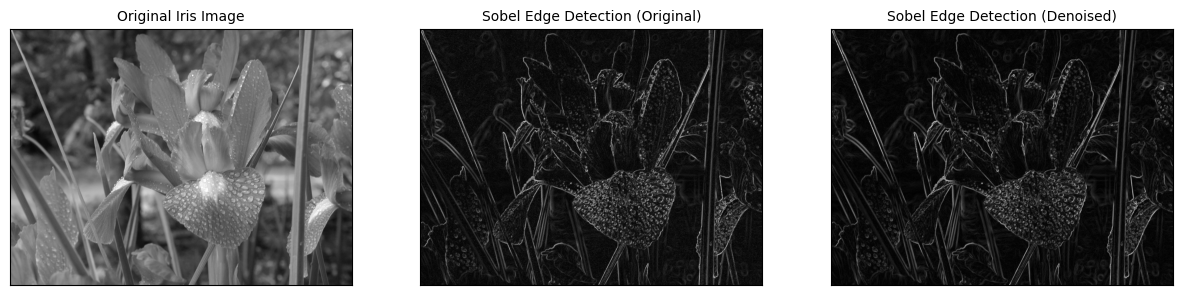

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 2.1)
#Apply Sobel edge detector to 'iris-RGB.tif'
iris_rgb = cv2.imread('iris-RGB.tif', 0)  # Load as grayscale
sobelx_iris = cv2.Sobel(iris_rgb, cv2.CV_64F, 1, 0, ksize=3)
sobely_iris = cv2.Sobel(iris_rgb, cv2.CV_64F, 0, 1, ksize=3)
sobel_iris = np.uint8(np.sqrt(sobelx_iris**2 + sobely_iris**2))

# 2.2)
#Denoise with a 3x3 box filter and then apply Sobel
box_filter = np.ones((3, 3), np.float32) / 9
denoised_iris = cv2.filter2D(iris_rgb, -1, box_filter)

sobelx_denoised = cv2.Sobel(denoised_iris, cv2.CV_64F, 1, 0, ksize=3)
sobely_denoised = cv2.Sobel(denoised_iris, cv2.CV_64F, 0, 1, ksize=3)
sobel_denoised = np.uint8(np.sqrt(sobelx_denoised**2 + sobely_denoised**2))

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(iris_rgb, cmap='gray')
axs[0].set_title('Original Iris Image', fontsize=10)
axs[1].imshow(sobel_iris, cmap='gray')
axs[1].set_title('Sobel Edge Detection (Original)', fontsize=10)
axs[2].imshow(sobel_denoised, cmap='gray')
axs[2].set_title('Sobel Edge Detection (Denoised)', fontsize=10)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

2.3) The effectiveness of denoising before edge detection largely depends on the image. For noisy images, applying a denoising filter beforehand enhances edge detection by reducing noise around edges, making them clearer.  

For instance, using a box filter to remove salt-and-pepper noise can help distinguish true edges and minimize false positives caused by noise. However, excessive denoising may blur edges, reducing the edge detector’s accuracy. The best approach balances noise reduction while preserving critical image details.


3.1) Use canny edge detector to detect edges in `building-1200by1200.tif`

3.2) Comment on how changing values of kernel size, lower and upper thresholds affect the overall edge detection.

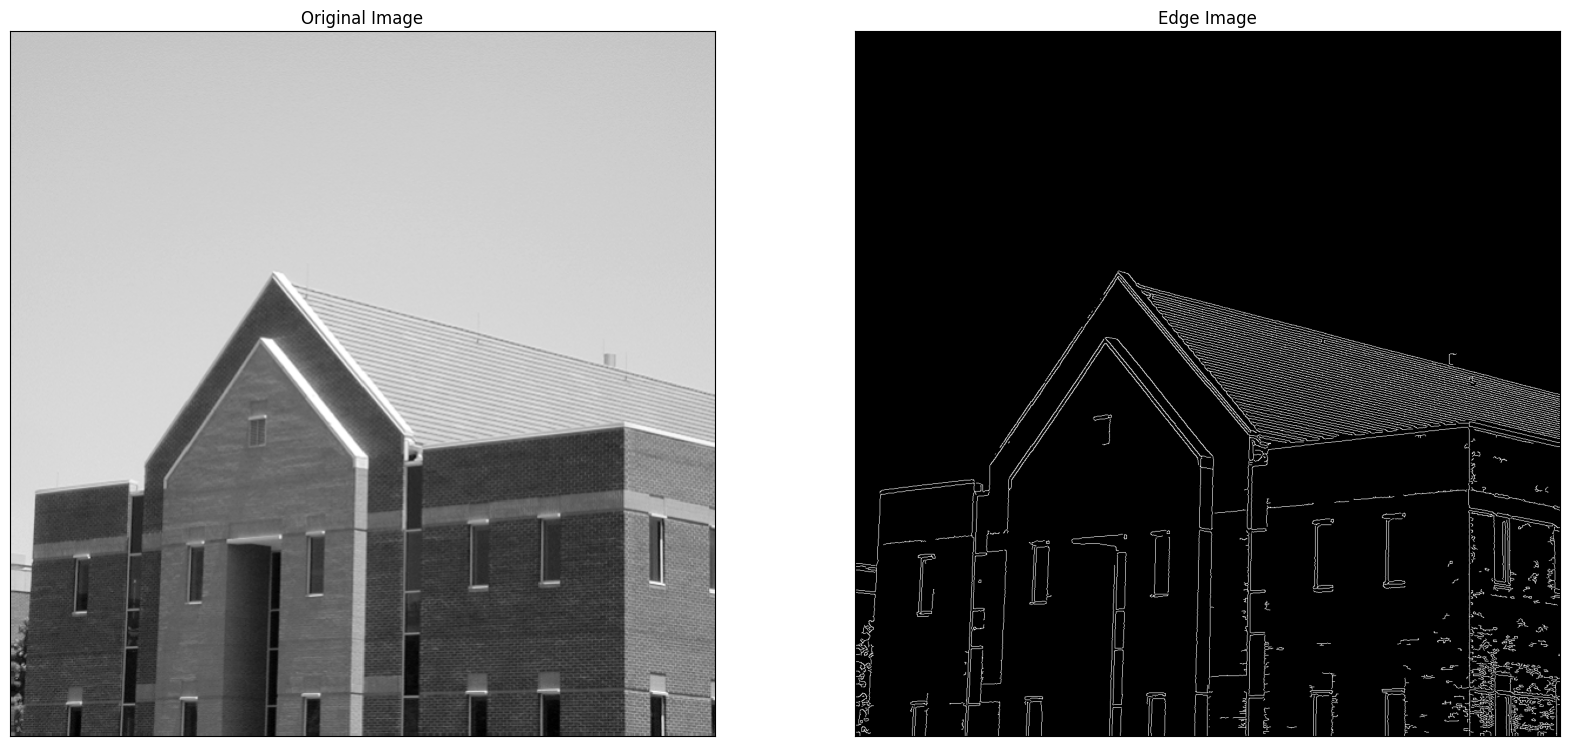

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
img = cv2.imread('building-1200by1200.tif', 0)

# Apply Gaussian blur to reduce noise (adjust kernel size as needed)
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Canny edge detection
min_Val = 50
max_Val = 100
edges = cv2.Canny(img_blurred, min_Val, max_Val)

# Display the original and edge-detected images
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])
plt.show()

3.2)The **kernel size** in Gaussian blur controls the trade-off between noise reduction and edge preservation. Larger kernels reduce noise but may blur fine edges, while smaller kernels retain details but leave more noise. The optimal choice depends on the image and desired smoothing level.  

In edge detection, the **min_Val** determines the minimum gradient for detecting edges, with lower values capturing more edges (including noise) and higher values reducing noise but missing details. The **max_Val** sets the intensity above which edges are always detected, with higher values focusing on strong edges and lower values increasing noise sensitivity. The **hysteresis process** links weak edges to strong ones, and the ratio between the thresholds affects how many weak edges are retained.


Try to detect all edges of `tiger.jpg` image. Then change the edge pixels colors to RED and show the result. Notice: result must the original image with the edges in red color.

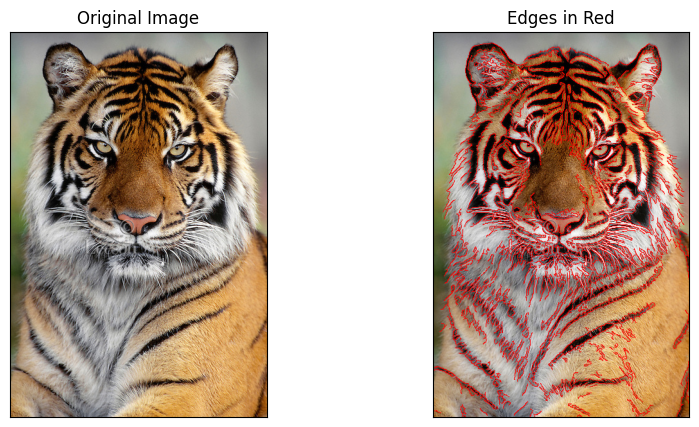

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('tiger.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny edge detector
edges = cv2.Canny(gray_blurred, 50, 150)

# Create a copy of the original image to draw the edges in red
img_with_edges = img.copy()

# Find the coordinates of the edge pixels
edge_coords = np.where(edges != 0)

# Change the color of edge pixels to red (BGR color space)
img_with_edges[edge_coords[0], edge_coords[1]] = [0, 0, 255]

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_with_edges[:,:,::-1])
plt.title('Edges in Red'), plt.xticks([]), plt.yticks([])

plt.show()


### Useful functions 1-  (Using OpenCV Trackbars to select Canny thresholds)
***Note, the following section requires running the cell on a local server (i.e. Jupyter notebook). It can't be run using google colab as it includes creating interactive windows***

The following code creates two trackbars to select the High and Low thresholds for the Canny edge detection

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# function to update the low and high thresholds
# using trackbars and display the result in a window named 'Edges'
def update_thresholds(x):
    global low_threshold
    global high_threshold
    low_threshold = cv2.getTrackbarPos('Low Threshold', 'Edges')
    high_threshold = cv2.getTrackbarPos('High Threshold', 'Edges')

    # Detect edges using Canny edge detection algorithm
    edges = cv2.Canny(img, low_threshold, high_threshold)

    # Display the result in a window named 'Edges'
    cv2.imshow('Edges', edges)

# Read the image and store it as a grayscale image
img = cv2.imread('iris-RGB.tif', 0)

# Create a window named 'Edges' that is resizable
cv2.namedWindow('Edges', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Edges', 600, 600)

# Create two trackbars named 'Low Threshold' and 'High Threshold'
cv2.createTrackbar('Low Threshold', 'Edges', 0, 255, update_thresholds)
cv2.createTrackbar('High Threshold', 'Edges', 0, 255, update_thresholds)

# Initialize the trackbars
update_thresholds(0)

# Wait for any key to be pressed
cv2.waitKey(0)

# Destroy all open windows
cv2.destroyAllWindows()

### Useful functions 2-  ( Using OpenCV Trackbars to select Canny thresholds and gaussian kernel size)
***Note, the following section requires running the cell on a local server (i.e. Jupyter notebook). It can't be run using google colab as it includes creating interactive windows***

In [ ]:
# Importing necessary libraries
import cv2
import numpy as np

# Function to update the thresholds and apply Gaussian blur and Canny edge detection
def update_thresholds(x):
    # Define global variables to store low and high thresholds
    global low_threshold
    global high_threshold
    low_threshold = cv2.getTrackbarPos('Low Threshold', 'Edges')
    high_threshold = cv2.getTrackbarPos('High Threshold', 'Edges')

    # Define global variable to store the kernel size
    global kernel_size
    kernel_size = cv2.getTrackbarPos('Kernel Size', 'Edges') * 2 + 1

    # Apply Gaussian blur to the image using the specified kernel size
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

    # Apply Canny edge detection to the blurred image
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    # Concatenate the original image, blurred image, and edges image horizontally
    concatenated_img = cv2.hconcat([img, blurred, edges])

    # Display the concatenated image
    cv2.imshow('Edges', concatenated_img)

# Function to update the kernel size
def update_kernel_size(x):
    global kernel_size
    kernel_size = cv2.getTrackbarPos('Kernel Size', 'Edges')*2+1
    update_thresholds(0)

# Read the input image
img = cv2.imread('iris-RGB.tif', 0)

# Create a window named 'Edges' to display the images
cv2.namedWindow('Edges', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Edges', 600, 600)

# Create trackbars to adjust the low and high thresholds
cv2.createTrackbar('Low Threshold', 'Edges', 0, 255, update_thresholds)
cv2.createTrackbar('High Threshold', 'Edges', 0, 255, update_thresholds)

# Create a trackbar to adjust the kernel size of the Gaussian blur
cv2.createTrackbar('Kernel Size', 'Edges', 1, 30, update_kernel_size)

# Initialize low and high thresholds and the kernel size
low_threshold = 0
high_threshold = 0
kernel_size = 3

# Call the update_thresholds function to display the concatenated image
update_thresholds(0)
cv2.waitKey(0)
cv2.destroyAllWindows()